# Homework 4 - Getting to know your customers

**Authors** : Bellaroba Albachiara 1892618, Grieco Nicola 2081607, Tamburini Tito 1837335 

Over time, the Banking sector has dabbled into plenty of Data Science applications. The latter includes topics such as Fraud detection, risk modelling for investment, personalized marketing, managing customer data and customer segmentation, among others. The latter is a crucial topic for a bank since they can offer their products more accurately and tailor-made depending on their clients' characteristics and how probable they will consume more services from the bank.

Now, you and your team have been hired by a bank to get to know their customers. In other words, you will implement hashing and clustering techniques to extract relevant information and highlights from those clients and their transactions.

Then, let's get started!

In [1]:
import pandas as pd
from datetime import datetime
from random import randint
from tqdm import tqdm
import numpy as np
from numpy.linalg import norm
from operator import itemgetter
import matplotlib.pyplot as plt
import pickle as pkl
from scipy import stats
from sklearn import preprocessing
from collections import Counter
from itertools import chain
import six
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
data = pd.read_csv("bank_transactions.csv")   # importing the dataset

In [ ]:
data                                        # visualize the data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
data.info()                                                 # showing some info on the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


In [ ]:
data.isna().sum()                                     # counts of rows with na

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
data.dropna(inplace=True)                                # removing na

In [ ]:
data.isna().sum()                                        # check

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
data.CustomerDOB =  pd.to_datetime(data.CustomerDOB)

In [ ]:
data.TransactionDate  = pd.to_datetime(data.TransactionDate)

In [ ]:
pd.to_datetime(data.TransactionTime)

0         1970-01-01 00:00:00.000143207
1         1970-01-01 00:00:00.000141858
2         1970-01-01 00:00:00.000142712
3         1970-01-01 00:00:00.000142714
4         1970-01-01 00:00:00.000181156
                       ...             
1048562   1970-01-01 00:00:00.000184824
1048563   1970-01-01 00:00:00.000183734
1048564   1970-01-01 00:00:00.000183313
1048565   1970-01-01 00:00:00.000184706
1048566   1970-01-01 00:00:00.000181222
Name: TransactionTime, Length: 1041614, dtype: datetime64[ns]

In [ ]:
data.TransactionTime 

0          143207
1          141858
2          142712
3          142714
4          181156
            ...  
1048562    184824
1048563    183734
1048564    183313
1048565    184706
1048566    181222
Name: TransactionTime, Length: 1041614, dtype: int64

In [ ]:
def convert_time(value):
    sec = str(value % 100)
    minutes = str((value //100) %100)
    hours = str((value // 10000) %100)
    return datetime.strptime(str(hours)+":"+str(minutes)+":"+str(sec), '%H:%M:%S').time()

In [ ]:
data.TransactionTime = data.TransactionTime.apply(lambda row: convert_time(row))

<AxesSubplot:>

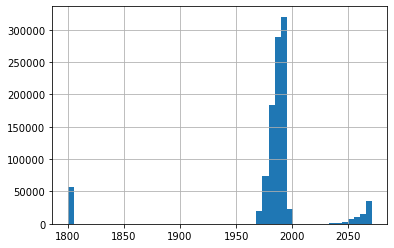

In [ ]:
data.CustomerDOB.dt.year.hist(bins=50)

In [ ]:
data.loc[data.CustomerDOB.dt.year > 2000,'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000,'CustomerDOB']  - pd.DateOffset(years=100)

In [ ]:
data.drop(data.loc[data.CustomerDOB.dt.year==1800].index,axis=0,inplace=True)

<AxesSubplot:>

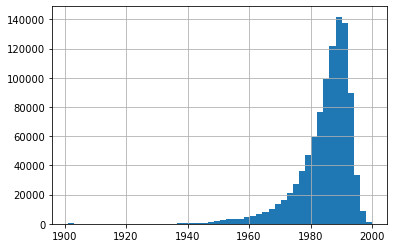

In [ ]:
data.CustomerDOB.dt.year.hist(bins=50)

In [ ]:
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)

In [ ]:
data.TransactionDate = pd.to_datetime(data.TransactionDate)

In [ ]:
data.CustGender = [str(x) for x in data.CustGender]

In [ ]:
data.CustLocation = [str(x) for x in data.CustLocation]

In [ ]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [ ]:
data.to_pickle("processed.pkl")

## 1. Finding Similar Costumers

Companies nowadays are implementing product suggestions to provide users with things they are likely to buy. 

The process often starts by finding similar behaviours among consumers; for this task, we will focus on this part in the specific.

Here you will implement an algorithm to find the most similar match to a consumer given his bank account information. 

In particular, you will implement your version of the LSH algorithm that takes as input information about a consumer and finds people similar to the one in the study.

### 1.1 Set up the data

In [ ]:
data = pd.read_pickle('processed2.pkl')

In [ ]:
data.isna().sum()

CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [ ]:
data.drop(['CustomerID','TransactionID'], axis = 1,inplace=True)

In [ ]:
data.index = [x for x in range(len(newdata))]

In [ ]:
data.info

<bound method DataFrame.info of        CustomerDOB CustGender   CustLocation  CustAccountBalance  \
0       1994-10-01          F     JAMSHEDPUR            17819.05   
1       1957-04-04          M        JHAJJAR             2270.69   
2       1996-11-26          F         MUMBAI            17874.44   
3       1973-09-14          F         MUMBAI           866503.21   
4       1988-03-24          F    NAVI MUMBAI             6714.43   
...            ...        ...            ...                 ...   
985317  1990-08-04          M      NEW DELHI             7635.19   
985318  1992-02-20          M         NASHIK            27311.42   
985319  1989-05-18          M      HYDERABAD           221757.06   
985320  1978-08-30          M  VISAKHAPATNAM            10117.87   
985321  1984-05-03          M           PUNE            75734.42   

       TransactionDate TransactionTime  TransactionAmount (INR)  
0           2016-02-08        14:32:07                     25.0  
1           2016-02

In [ ]:
data.to_pickle('newdata.pkl')

## 1.2 Fingerprint Hashing

In [ ]:
transactions = pd.read_pickle('new_data.pkl') #bank_transactions.csv dataset already processed, 'TransactionID' and 'CustomerID' columns are dropped

In [ ]:
transactions.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


#### Hash function implemented for creating an hash value for each value in the dataframe

In [ ]:
# Hash function for datetime type
def hash_date(value):
    return int(pd.Timestamp(value).timestamp())

In [ ]:
#Hash function for string type
def hash_string(value,p):
    m =2^32 -1
    a =101
    b=456
    first  = sum([ ord(x)*(p^i) for i,x in enumerate(value)])%m
    return (a* first + b)%p

In [ ]:
#Hash function for float type
def hash_float(value):
    return int(value)

In [ ]:
#Collective Hash function, checks on the type of value parameter and applies the right hash function
def my_hash (value,p):
    if not isinstance(value,int):
            if isinstance(value,datetime): 
                value  = hash_date(value)
            elif isinstance(value,str): 
                value = hash_string(value,p)
            elif isinstance(value,float): 
                value = hash_float(value)
    return value

#### Initialization of the parameter for the MinHash algorithm

In [ ]:
p  = 125539 #prime number
N  = 100  #number of permutations
max_val = 2^32-1 #value used for the randomization in the creation of the permutations
permutations = [(randint(0,max_val), randint(0,max_val)) for _ in range(N)] #  N permutations of two integers a,b

#### MinHash function: creates a minHash signature for the transaction given as input.

The minHash function to create a minhash signature for each transaction has this parameters:
1. N hash functions that have this structure : f(value,a,b,p): return (a*value+b)%p, the N coefficients a and b are obtained by permutating two integers N times
2. p which is a prime number

The signature is represented as an array of length N, the i-th element is the minimum hash value obtained by applying the i-th hash function to every hash value of the transaction's features.

In [ ]:
def minHash(transaction,p,permutations):
    vec  = [float(np.inf) for _ in range(len(permutations))]

    for i,val in transaction.items():#Iterate over the features of the transaction 
        
        val =  my_hash(val,p)# Create Hash value for the features
        
        for perm_i,perm_vals in enumerate(permutations): #Apply N permutations to every hash value of the transaction
            
            a,b = perm_vals

            output = (a*val + b)%p 
       
            if(vec[perm_i] > output ): 
                vec[perm_i] = output

    return vec # Hash Signature for the given transaction

#### Create 'minhash' column for the bank_transactions.csv dataset

In [ ]:
transactions['minhash']  = [minHash(transactions.loc[i],p,permutations) for i in tqdm(range(len(new_data)))]

100%|██████████| 985322/985322 [12:09<00:00, 1350.76it/s]


In [ ]:
transactions.minhash

0         [720, 598, 214, 100, 357, 316, 248, 134, 229, ...
1         [5476, 15157, 5027, 2632, 2735, 7912, 936, 329...
2         [5476, 10580, 3686, 1836, 2735, 5524, 4154, 23...
3         [5476, 18431, 7702, 3844, 2735, 11548, 8672, 4...
4         [5476, 22126, 7702, 3844, 2735, 11548, 8097, 4...
                                ...                        
985317    [22392, 18400, 6406, 3196, 11193, 9604, 7214, ...
985318    [4742, 481, 3694, 1840, 2368, 5536, 4163, 2309...
985319    [21580, 17733, 6174, 3080, 10787, 9256, 6953, ...
985320    [24689, 23023, 3929, 4000, 14007, 12016, 9023,...
985321    [15616, 12834, 4470, 2228, 7805, 1839, 5036, 2...
Name: minhash, Length: 985322, dtype: object

## 1.3 Locality Sensitive Hashing

### LoadQuery dataset

In [ ]:
query =  pd.read_pickle('query.pkl')


In [ ]:
query.index = [ i for i in range(len(query))] #Adjust query dataset index

#### Create 'minhash' column for the query.csv dataframe

In [ ]:
query['minhash']  = [minHash(query.loc[i],p,permutations) for i in tqdm(range(len(query)))]

100%|██████████| 46/46 [00:00<00:00, 836.83it/s]


In [ ]:
query.head().minhash

0    [1840, 1518, 534, 260, 917, 796, 608, 334, 549...
1    [39435, 3087, 19822, 9904, 20987, 29728, 22307...
2    [15168, 12466, 4342, 2164, 7581, 6508, 4892, 2...
3    [18636, 23023, 8014, 4000, 9315, 10542, 9023, ...
4    [2260, 1863, 654, 320, 1127, 976, 743, 409, 66...
Name: minhash, dtype: object

### LSH 

INPUT
1. *dictc* a dictionary (empty or not), every key in the dict is a bin, the values are lists of the indexes of the rows that fell in the bin
2. *df* a dataframe that has a column 'minhash' containing the rows' signatures
3. *query* boolean parameter deafault if True it will insertthe index of the df row in the bucket in this format 'q<*index*>'. ù
4. *band* integer that represents the bandwidth of the algorithm, must be smaller than N. 

If you use a lower bandwidth each signature can fall in more bins so it will create more matching between the signatures.
If you use a higher bandwidth each signature can fall in less bins,so it will create much less matches between the signatures, but if two signatures fall in the same bin it will represent a stronger similarity.

OUTPUT
1. returns *dictc* after all the rows in the *df* dataframe are assigned to the correct bins

In [ ]:
# LSH algorithm implementation
def LSH(dictc,df,query,band):
    for i,hash_vec in enumerate(df.minhash):
        step = len(hash_vec)//band
        j = 0
        idx = 0
        while(j<len(hash_vec)):
            sub_vec = hash_vec[j:j+step]
            sep = '-'
            key  = sep.join([str(x) for x in sub_vec])+','+str(idx)
            if key not in dictc.keys():
                dictc[key]  = []
            if(query):
                dictc[key].append('q'+str(df.index))
            else:
                dictc[key].append(df.index)
            j += step
            idx +=1
    return dictc
       


#### fill_bin()
This function fills the bins of the query with the index every row passed in the df dataframe, if the row signatures falls in this bins.

In [ ]:
def fill_bins(query_bins,df,band):
    for i,hash_vec in enumerate(df.minhash):
        step = len(hash_vec)//band
        j = 0
        idx = 0
        while(j<len(hash_vec)):
            sub_vec = hash_vec[j:j+step]
            sep = '-'
            key  = sep.join([str(x) for x in sub_vec])+','+str(idx)
            if key in query_bins.keys():
                query_bins[key].append(i)
            j += step
            idx +=1
    return query_bins
       


#### Find the most similar Customer in the bank_transaction.csv file for the given Customer query

In [ ]:
# query is the entire row in the query.csv file with his minHash signature
# df is the dataframe where we want to find the most similar to the query, df comes with all the minHash signature for every Transaction in the dataset
# band: bandwidth parameter, sets the number of subdivisions in the minHash signature of the rows in df
#Changing the value of the bandwidth will create more matches, but the most similar will be unaffected
def check_similar(query,band,df):
    query_i= 'q'+str(query.index[0])
    bins = {} # Initialization of the dictionary that will represents the bins for the given query row
    LSH(bins,query,True,band) # LSH  algorithm: fills the dictionary creating the right bins for the given query row
    fill_bins(bins,df,band) #fill_bins:  function to insert in the right bins the index of every the df row 
    
    matches = [ x for v,x in bins.items()]
   
    matches  = [x for x in list(chain.from_iterable(matches)) if x != query_i and 'q' not in str(x)]
    c = Counter(matches)
    if( not c.most_common()):
        return 'NA'
    return c.most_common()[0][0] #Return the index in the df dataframe corresponding to the most similar Transaction

#### Find most similar for every row in query.csv in the bank_transaction.csv dataset

In [ ]:
matches =[]
for i in tqdm(query.index):
        matches.append(check_similar(query[i:i+1],4,transactions))

100%|██████████| 46/46 [31:46<00:00, 41.46s/it]


In [ ]:
query_results  = pd.DataFrame(columns=['query_index','match_df_index'])


In [ ]:
query_results['match_df_index'] = matches
query_results['query_index']  = query.index

In [ ]:
query_results

,query_index,match_df_index
0,0,701472
1,1,684212
2,2,296431
3,3,601262
4,4,8675
5,5,880492
6,6,68
7,7,13
8,8,563650
9,9,532514


## 2. Grouping customers together!

Now we will deal with clustering algorithms that will provide groups of clients which are similar among them.

### 2.1 Getting your data + feature engineering

2.1 Access to the data found in this dataset (it is the same dataset from the previous question 1.1).

In [ ]:
newdata = pd.read_pickle("processed.pkl")

In [ ]:
newdata

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [ ]:
newdata.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
newdata.index = [x for x in range(len(newdata))]

2.2 Sometimes, the features (variables, fields) are not given in a dataset but can be created from it. The previous step is known as feature engineering. For example, the original dataset has several transactions done by the same customer. Then, we suggest you to group data by the client (using CustomerId) and, based on it, create the following new features for each CustomerId:

####   a) Number of transactions

In [ ]:
newdata["NumberTransactions"] = newdata.groupby('CustomerID')["TransactionID"].transform("count")

In [ ]:
newdata2["NumberTransactions"] = newdata.groupby('CustomerID')["TransactionID"].count()

#### b) Number of transactions with a balance bigger than 100 UDS   da fare

In [ ]:
newdata["CustAccountBalance (USD)"] = newdata["CustAccountBalance"] * 0.012244201

In [ ]:
newdata["N_trans_bal>100"] = newdata[newdata["CustAccountBalance (USD)"]>100].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_trans_bal>100"].fillna(0, inplace = True)

#### c) Average amount of transactions

In [ ]:
newdata["AverageAmount (INR)"] = newdata.groupby('CustomerID')["TransactionAmount (INR)"].transform("mean")

#### d) Average Balance

In [ ]:
newdata["AverageBalance (INR)"] = newdata.groupby('CustomerID')["CustAccountBalance"].transform("mean")

#### e) Average difference between the balance and the transaction amount for each customer (this is mainly known in the banking world as    utilisation).

In [ ]:
newdata["Utilization"] = newdata["AverageBalance (INR)"] - newdata["AverageAmount (INR)"]

#### f) Most common gender of the customer

In [ ]:
result = newdata.groupby(['CustomerID'])['CustGender'].agg(pd.Series.mode)

In [ ]:
newdata["MostCommonGender"] = "NA"

In [ ]:
newdata['MostCommonGender'] = newdata.CustomerID.apply(lambda x: result[x])

#### g) Most frequent location of the customer

In [ ]:
result2 = newdata.groupby(['CustomerID'])['CustLocation'].agg(pd.Series.mode)

In [ ]:
newdata["MostFreqLocation"] = "NA"

In [ ]:
newdata["MostFreqLocation"] = newdata.CustomerID.apply(lambda x: result2[x])

2.1.3 Consider at least 20 additional features that can be generated for each CustomerId. Describe each of them and why you believe they will be helpful. Moreover, add it to the previous dataset (the one with seven features).

####  TransactionAmount (USD)

One of the previous questions involved constructing a variable based on currency conversion to dollars. Therefore, we thought of transaction amount conversion,to facilitate its interpretation as well.

In [ ]:
newdata["TransactionAmount (USD)"] = newdata["TransactionAmount (INR)"] * 0.012244201 

#### AverageAmount (USD)

We thought the same as average amount of transaction.

In [ ]:
newdata["AverageAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("mean")  

#### CustAccountBalance (USD)

The same coversion in dollars applied before.

In [ ]:
newdata["CustAccountBalance (USD)"] = newdata["CustAccountBalance"] * 0.012244201

#### AverageBalance (USD)

The same conversion in dollars applied before.

In [ ]:
newdata["AverageBalance (USD)"] = newdata["AverageBalance (INR)"] * 0.012244201

#### MaxAmountTrans (USD)

It may be useful to identify what is the maximum transaction amount for each customer id, perhaps to come up with some sort of promotion based on transaction size.

In [ ]:
newdata["MaxAmountTrans (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("max")  

#### MinAmountTrans (USD)

It may be useful to identify what the minimum transaction amount is for each customer id, perhaps to understand whether to change the minimum transaction threshold. In addition, if there are a lot of transactions with a very low minimum it might make sense to develop a system to authorize very low transactions without the need to enter a code, again of course at the user's choice.

In [ ]:
newdata["MinAmountTrans (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("min") 

#### MaxBalance (USD)

We want to see what the maximum budget is for each customer id, so we can understand whether this customer plays an important role for the bank.

In [ ]:
newdata["MaxBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("max") 

#### MinBalance (USD)

We want to see what the minimum balance is for each customer id, so that we can understand if there are customers with a really low amount in the account, maybe it might make sense to offer them how much facilitation to push them to deposit with the bank larger amounts, should they have.

In [ ]:
newdata["MinBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("min") 

#### CustomerAge

We have to use it to build AverageCustomerAge to know the mean of the ages among all customers that have the same CustomerID.

In [ ]:
newdata['CustomerAge'] = ((pd.to_datetime('today')-newdata.CustomerDOB)/np.timedelta64(1,'Y')).round(0)
newdata['CustomerAge'] = newdata['CustomerAge'].astype(int)

#### NumberMorningTransactions

This is the number of transactions made by each CustomerID between 06:00:00 and 12:00:00.

In [ ]:
newdata["N_morningTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("06:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("12:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_morningTransactions"].fillna(0, inplace = True)

#### NumberAfternoonTransaction

This is the number of transactions made by each CustomerID between 12:00:00 and 18:00:00.

In [ ]:
newdata["N_afternoonTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("12:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("18:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_afternoonTransactions"].fillna(0, inplace = True)

#### NumberEveningTransaction

This is the number of transactions made by each CustomerID between 18:00:00 and 23:59:59.

In [ ]:
newdata["N_eveningTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("18:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] <= datetime.strptime("23:59:59", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_eveningTransactions"].fillna(0, inplace = True)

#### NumberNigthTransaction

This is the number of transactions made by each CustomerID between 00:00:00 and 06:00:00.

In [ ]:
newdata["N_nigthTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("00:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("06:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_nigthTransactions"].fillna(0, inplace = True)

#### Amount percentage of Balance (USD)

This represents the percentage of each transaction amount on the total own balance. This variable will help to understand which transactions are large, not relative to the amount, but relative to the total.

In [ ]:
newdata['Amount_percentage_of_Balance (USD)'] = newdata['TransactionAmount (USD)'] / newdata['CustAccountBalance (USD)']*100 

#### Number of Negative Transaction

We are interested in knowing the number of transactions that lead to a negative balance situation. In this way we can find out which consumers are going into negative balance the most.

In [ ]:
newdata["NumberNegativeTransaction"] = newdata[newdata["TransactionAmount (INR)"]>newdata["CustAccountBalance"]].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["NumberNegativeTransaction"].fillna(0, inplace = True)

#### Number of Transaction > Half Balance

Using this variable we know the number of really very large transactions, even more than half of one's balance.

In [ ]:
newdata["NTransaction>HalfBalance"] = newdata[newdata["TransactionAmount (INR)"]>(newdata["CustAccountBalance"]/2)].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["NTransaction>HalfBalance"].fillna(0, inplace = True)

#### Recency

The recency factor is based on the notion that the more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases. This information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs.

In [ ]:
newdata['DaysSinceTransaction'] = (pd.to_datetime('today') - newdata['TransactionDate'])/np.timedelta64(1, 'D')
newdata['DaysSinceTransaction'] = newdata['DaysSinceTransaction'] - newdata['DaysSinceTransaction'].min()

In [ ]:
newdata = newdata.rename(columns = {'DaysSinceTransaction' : 'Recency'})

#### Number of Transactions bigger than 1/10 of the balance

Another treshold to compute the number of transactions.

In [ ]:
newdata["N_trans_>one_tenth_bal"] = newdata[newdata["TransactionAmount (USD)"]> (newdata["CustAccountBalance (USD)"])/10].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_trans_>one_tenth_bal"].fillna(0,inplace = True)

#### Date of First Transaction

We create a new feature that contains for each CustomerID the date of the first transaction. It can be useful to recognize the accounts that have been in operation the longest.

In [ ]:
newdata['DateFirstTransaction'] = newdata.groupby("CustomerID")["TransactionDate"].transform("min")

#### MedianAmount (USD)

In [ ]:
newdata["MedianAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("median") 

#### VarianceAmount 

In [ ]:
newdata["VarianceAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("var") 
newdata["VarianceAmount (USD)"].fillna(0, inplace = True)

#### MedianBalance (USD)

In [ ]:
newdata["MedianBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("median") 

#### VarianceBalance 

In [ ]:
newdata["VarianceBalance"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("var") 
newdata["VarianceBalance"].fillna(0, inplace = True)

#### AverageRecency

We use the variable we constructed earlier inherent to all transactions to construct a new variable that can be descriptive for each CustomerID. We then proceed by averaging for each CustomerID the Recency variable.

In [ ]:
newdata["AverageRecency"] = newdata.groupby('CustomerID')["Recency"].transform("mean")  

#### AverageCustomerAge

In [ ]:
newdata["AverageCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("mean")  

#### MedianCustomerAge

In [ ]:
newdata["MedianCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("median")  

#### VarianceCustomerAge

In [ ]:
newdata["VarianceCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("var")  
newdata["VarianceCustomerAge"].fillna(0, inplace = True)

We reached a number of  features (27 suggested by us + 7 recommended).

For the next exercize we will need only the features created grouping by the CustomerID, so we have to drop the others.

In [ ]:
newdata2 = newdata.drop(['CustAccountBalance (USD)', 'TransactionAmount (USD)', 'CustomerAge', 'Amount_percentage_of_Balance (USD)', 'Recency'], axis = 1)

In [95]:
newdata2.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

In [96]:
print("The total number of columns of the dataframe is:" , newdata2.shape[1])

The total number of columns of the dataframe is: 38


Now we want to create the new dataframe composed only by the features created using the goupby on CustomerID.

In [ ]:
newdata2.to_pickle('newdata_eng2.pkl')

In [97]:
newdata2 = pd.read_pickle('newdata_eng2.pkl')

In [98]:
newdata2

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NumberTransactions,...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,1,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,1,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,1,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,1,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985317,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,1,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
985318,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,1,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0
985319,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2,...,0.0,2016-09-15,5.987414,23.675739,1380.158133,3.564877e+06,83.5,43.5,43.5,180.5
985320,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,1,...,0.0,2016-09-18,12.244201,0.000000,123.885234,0.000000e+00,82.0,44.0,44.0,0.0


In [99]:
CID_data = newdata2[['CustomerID','NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge']]

We selected only the featured created by us grouping on the CustomerID, 7 recommended + 23 suggested by us.

In [100]:
CID_data.shape

(985322, 30)

Since we have grouped by CustomerID we have only to drop the duplicate rows to obtain the new dataset.

In [101]:
CID_data = CID_data.drop_duplicates(subset = ["CustomerID"])

In [102]:
CID_data.index = [x for x in range(len(CID_data))]

In [103]:
CID_data

,CustomerID,NumberTransactions,N_trans_bal>100,AverageAmount (INR),AverageBalance (INR),Utilization,MostCommonGender,MostFreqLocation,AverageAmount (USD),AverageBalance (USD),...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,C5841053,1,1.0,25.0,17819.050,17794.050,F,JAMSHEDPUR,0.306105,218.180030,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,C2142763,1,0.0,27999.0,2270.690,-25728.310,M,JHAJJAR,342.825384,27.802785,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,C4417068,1,1.0,459.0,17874.440,17415.440,F,MUMBAI,5.620088,218.858236,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,C5342380,2,1.0,1469.2,434849.495,433380.295,"[F, M]",MUMBAI,17.989180,5324.384622,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,C9031234,1,0.0,1762.5,6714.430,4951.930,F,NAVI MUMBAI,21.580404,82.212831,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,1,0.0,3000.0,464.870,-2535.130,M,PUNE,36.732603,5.691962,...,1.0,2016-09-18,36.732603,0.000000,5.691962,0.000000e+00,82.0,43.0,43.0,0.0
839077,C1034220,1,0.0,1500.0,1212.700,-287.300,M,BANGALORE,18.366301,14.848543,...,1.0,2016-09-18,18.366301,0.000000,14.848543,0.000000e+00,82.0,30.0,30.0,0.0
839078,C8020229,1,0.0,799.0,7635.190,6836.190,M,NEW DELHI,9.783117,93.486801,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
839079,C6459278,1,1.0,460.0,27311.420,26851.420,M,NASHIK,5.632332,334.406516,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0


In [104]:
CID_data.to_pickle('CID_data.pkl')

### 2.2 Choose your features (variables)!

In [105]:
newdata2.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

In [32]:
CID_data = pd.read_pickle("CID_data.pkl")

In [33]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF'],
      dtype='object')

### Our dimensionality reduction:

- #### 1. & 2.
    Since we have plenty of features to work with, possibly with high correlation we decide to apply a principal component analysis to reduct dimensionality. In order to do that we have to discuss about the different ways to pre-processing the data. 
    The two main methods to do features scaling are normalization and standardization. They are different : standardization removes the mean and scale the data with standard deviation while normalisation often refers to scaling the data to [0,1] 
    PCA seeks the direction that maximises the variance and scaling the data differently changes the PCA vectors. One of the problems using normalisation is that it could skew the distribution and obscure the physical meaning of the variables under certain circumstances. If there is an anomaly in one of the random variables,  the scaling during normalisation would skew anomaly feature massively - resulting in different PCA vectors after normalisation. On the other hand, standardization is slightly affected by outliers and is not bounded by range. Another benefit of standardisation is to avoid numerical precision error when the order of magnitude of the variables are different,  and in our case there are variables like AverageBalance, AverageAge, AverageAmount, NumberTransactions etc. that varies from high to very small numbers.

    The first mandatory step to perform PCA is to to center the data subtracting the mean of each feature while whether to use standardization or not depends on the data. Our features has different scales (INR, USD, Age, percentages etc.), so after the centering we are going to divide each feature by its standard deviation.
    There are categorial variables in our dataset for which we need to reserve a different treatment. Fo this reason, we choose to apply One Hot Encoding to these features generating dummy variables which are duplicates variables which represent one level of a categorical variable. In practise that means it will replace a 1 instead of the category of interest and 0 for the others.
    
    One limitation of this method is that the independent features become less interpretable because these principal components are also not readable or interpretable. 
    
    Let's start !!!
    

In [108]:
CID_data.MostCommonGender = [str(x)for x in CID_data["MostCommonGender"].values]

In [109]:
CID_data.MostCommonGender = CID_data.MostCommonGender.replace("['F' 'M']", "MF")

In [116]:
CID_data.to_pickle('CID_data.pkl')

Drop the discrete and non-numeric variables because we will use only the continuous one.

In [ ]:
CID_data = CID_data.drop(["DateFirstTransaction", "MostFreqLocation"], axis = 1)

We keep only the Most Common Gender discrete variable and we convert it into numeric with get_dummies method.

In [ ]:
CID_data = pd.get_dummies(CID_data, columns = ["MostCommonGender"])

In [112]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF'],
      dtype='object')

In [113]:
X_train = CID_data[['NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge']]

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.4005415 ,  0.45222652, -0.23632378, ..., -1.10605755,
        -1.10304872, -0.15211908],
       [-0.4005415 , -1.21145007,  4.39115227, ...,  3.30548845,
         3.30748459, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.16453123, ..., -1.33824419,
        -1.33518205, -0.15211908],
       ...,
       [-0.4005415 , -1.21145007, -0.10828823, ..., -0.64168429,
        -0.63878206, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.16436581, ..., -0.75777761,
        -0.75484872, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.07503869, ...,  0.7514355 ,
         0.75401794, -0.15211908]])

In [114]:
CID_data[['NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge']] = X_scaled.tolist()

In [115]:
CID_data

,CustomerID,NumberTransactions,N_trans_bal>100,AverageAmount (INR),AverageBalance (INR),Utilization,AverageAmount (USD),AverageBalance (USD),MaxAmountTrans (USD),MinAmountTrans (USD),...,VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge,MostCommonGender_F,MostCommonGender_M,MostCommonGender_MF
0,C5841053,-0.400541,0.452227,-0.236324,-0.111969,-0.110195,-0.236324,-0.111969,-0.243211,-0.214280,...,-0.012625,-0.110568,-0.007343,2.130369,-1.106058,-1.103049,-0.152119,1,0,0
1,C2142763,-0.400541,-1.211450,4.391152,-0.131744,-0.165571,4.391152,-0.131744,3.977555,4.539661,...,-0.012625,-0.130388,-0.007343,2.130369,3.305488,3.307485,-0.152119,0,1,0
2,C4417068,-0.400541,0.452227,-0.164531,-0.111898,-0.110676,-0.164531,-0.111898,-0.177728,-0.140526,...,-0.012625,-0.110498,-0.007343,2.130369,-1.338244,-1.335182,-0.152119,1,0,0
3,C5342380,1.897629,0.452227,0.002577,0.418435,0.418579,0.002577,0.418435,0.063833,-0.069252,...,-0.010675,0.421015,0.020332,0.949362,1.041669,1.044185,0.001124,0,0,1
4,C9031234,-0.400541,-1.211450,0.051095,-0.126092,-0.126534,0.051095,-0.126092,0.018946,0.080993,...,-0.012625,-0.124723,-0.007343,2.130369,-0.293404,-0.290582,-0.152119,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,-0.400541,-1.211450,0.255803,-0.134041,-0.136061,0.255803,-0.134041,0.205662,0.291296,...,-0.012625,-0.132689,-0.007343,-0.686365,0.635342,0.637951,-0.152119,0,1,0
839077,C1034220,-0.400541,-1.211450,0.007672,-0.133089,-0.133201,0.007672,-0.133089,-0.020661,0.036384,...,-0.012625,-0.131736,-0.007343,-0.686365,-0.873871,-0.870915,-0.152119,0,1,0
839078,C8020229,-0.400541,-1.211450,-0.108288,-0.124921,-0.124137,-0.108288,-0.124921,-0.126429,-0.082745,...,-0.012625,-0.123550,-0.007343,-0.686365,-0.641684,-0.638782,-0.152119,0,1,0
839079,C6459278,-0.400541,0.452227,-0.164366,-0.099896,-0.098670,-0.164366,-0.099896,-0.177578,-0.140356,...,-0.012625,-0.098468,-0.007343,-0.686365,-0.757778,-0.754849,-0.152119,0,1,0


We can see that now all the numeric variebles are standardized and the categorial are stored as dummy variables.

In [117]:
CID_data.to_pickle('stand_CID_data.pkl')

In [25]:
CID_data = pd.read_pickle('stand_CID_data.pkl')

We create a copy of our dataset so we can easily remove the CustomerID columns that we won't need in this phase, and we pass it throug the PCA function.

In [36]:
CID_data_copy = CID_data.copy()

In [37]:
CID_data_copy = CID_data_copy.drop('CustomerID', axis=1)

We are ready to apply the PCA function, and we compute the first 10 principal components. Our goal is to select the minimum number of components to reach the 70% of explained variance. 

In [38]:
#try the PCA with an high number of components and then check how many do we need

pca = PCA(n_components=10)
pca.fit(CID_data_copy)

v = pca.explained_variance_ratio_
print(v)
print(sum(v))
print(pca.singular_values_)

[0.2290482  0.18594825 0.10028056 0.07398973 0.06044252 0.05674721
 0.05207603 0.04271795 0.03779718 0.03422893]
0.8732765553165416
[2254.59306575 2031.42493321 1491.80857268 1281.41691883 1158.17987768
 1122.21736723 1075.03757369  973.66588514  915.87124753  871.5682609 ]


In [39]:
explained_var = 0.7
n_component = 0
for i in range(len(v)):
    if sum(v[0:i]) <= explained_var:
        n_component+=1

print('The number of components we need to ensure the 0.7 of variance is:', n_component)

The number of components we need to ensure the 0.7 of variance is: 6


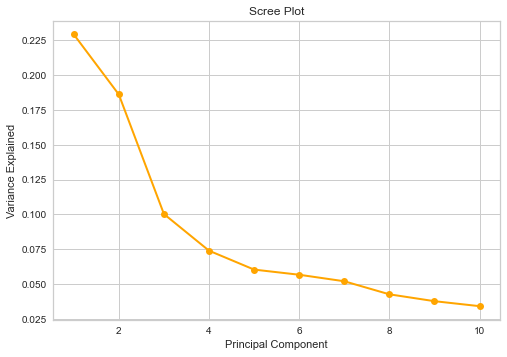

In [40]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='orange')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

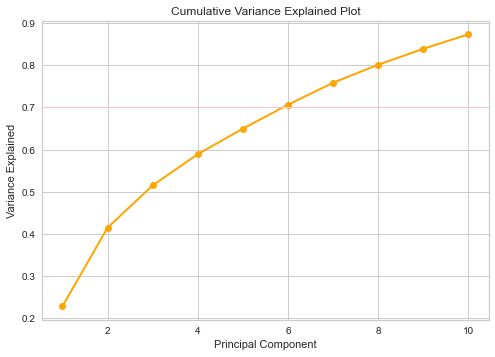

In [41]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='orange')
plt.title('Cumulative Variance Explained Plot')
plt.axhline(y=0.70, color='pink', linestyle='-',linewidth=1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Now that we have the right number of components to use, we compute again the principal components and store them into a dataframe, in order to use it for the clustering.

In [42]:
#right PCA with 6 components

pca = PCA(n_components=6)
pca.fit(CID_data_copy)

PCA(n_components=6)

In [43]:
scores_pca=pca.transform(CID_data_copy)

In [44]:
scores_pca

array([[-0.5188914 , -0.61837208,  0.34631932,  1.46487449, -1.28187192,
         0.92369607],
       [ 2.59342931, 10.23876058, -1.59266084, -4.22878619, -1.0368638 ,
        -1.04459085],
       [-0.51635171, -0.48734065,  0.27554024,  1.77817631, -1.28951518,
         1.01169578],
       ...,
       [-0.55723346, -0.09409132, -1.06725187,  0.84070636,  1.07233087,
        -0.42443095],
       [-0.41045055, -0.49272147,  0.49405215,  1.29862049,  1.0986015 ,
        -0.12148441],
       [-0.15410862, -0.17098465,  1.0954026 , -0.57939096,  1.13512503,
        -0.72707393]])

In [45]:
PCA_components = pd.DataFrame(data = scores_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [46]:
PCA_components

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.518891,-0.618372,0.346319,1.464874,-1.281872,0.923696
1,2.593429,10.238761,-1.592661,-4.228786,-1.036864,-1.044591
2,-0.516352,-0.487341,0.275540,1.778176,-1.289515,1.011696
3,1.191499,-0.276929,1.227689,-1.421101,-0.704120,1.541486
4,-0.412399,0.277057,-0.890566,0.504830,1.101962,-0.557547
...,...,...,...,...,...,...
839076,-0.277962,1.357223,-3.587174,-1.790675,1.360309,-0.599223
839077,-0.674376,0.717460,-4.220924,0.037691,1.327663,0.016071
839078,-0.557233,-0.094091,-1.067252,0.840706,1.072331,-0.424431
839079,-0.410451,-0.492721,0.494052,1.298620,1.098601,-0.121484


In [47]:
PCA_components.to_csv('PCA_components.csv')

### 2.3 Clustering!

In [4]:
! sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,073 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:1

In [6]:
! sudo mkdir -p /usr/share/man/man1

In [7]:
! sudo apt-get install -y openjdk-11-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  openjdk-11-demo openjdk-11-source visualvm
The following NEW packages will be installed:
  openjdk-11-jdk
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 13.6 kB of archives.
After this operation, 56.3 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openjdk-11-jdk amd64 11.0.17+8-1ubuntu2~18.04 [13.6 kB]
Fetched 13.6 kB in 0s (32.9 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf:

In [8]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 54.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=77be5222954f7ade5bb46f183e84cab7dc2393a8c055d41e50ddeb0b123d57ae
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [3]:
import sys
import os
import json
from pyspark import SparkContext
from pyspark.sql import SparkSession
import time

In [10]:
spark = SparkSession.builder.appName('clustering').getOrCreate()
spark

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data = spark.read.csv("/content/drive/MyDrive/ADM_HW4/PCA_components.csv", header=True, inferSchema=True)

In [13]:
data

DataFrame[_c0: int, pc1: double, pc2: double, pc3: double, pc4: double, pc5: double, pc6: double]

In [14]:
data = data.drop('_c0')

In [15]:
data.show(10)

+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+
|                 pc1|                 pc2|                pc3|                 pc4|                pc5|                 pc6|
+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+
| -0.5201049272967656|  -0.616241567747282|0.33723040303585794|  1.4651807071780805|-1.2954077844998024|  0.9077596994851468|
|   2.612077232101859|  10.232305852432924|-1.5832948071052153|  -4.256394843107796|-1.0022263515668417| -1.0077804069446663|
| -0.5173560111230056|-0.48516092529031507| 0.2649776674304945|  1.7787744164871162|-1.3052093215527456|  0.9934443912427067|
|  1.1908799740364018| -0.2787586138289239| 1.2378009303461825| -1.4090336481703383|-0.7173806778423387|  1.5393003382560229|
| -0.4121600578035001| 0.27801426704461485|-0.8967262634584299|  0.4969232451203754| 1.1104590152478793| -0.5356625268

#### 1 - Implementation of the K-means clustering algorithm using MapReduce.

In [16]:
def assign_cluster(x, centroids):
    d = []  #list of the distances
    for i in centroids:
        dist = np.linalg.norm(np.array(x) - np.array(i))
        d.append(dist)
    return (np.argmin(d), np.array(x))

In [17]:
def new_centroid(old_centroids):
    out = sum(old_centroids) / len(old_centroids)
    return out

In [18]:
def square_loss(y, centroid):
    loss = np.linalg.norm(np.array(y[1])-np.array(centroid[y[0]]))
    sqloss = np.square(loss)
    return sqloss

In [19]:
def clustering(X, k):

    #INITIALIZATION
    threshold = 0.1
    diff = [100000000, 10000000]
    i=0

    #START: random centroids
    centroids = X.rdd.takeSample(False, k)

    #ITERATION (if stopping condition satisfied)
    while diff[i]-diff[i+1] > threshold and i<100: # 100 = maximum iterations number

      cl = X.rdd.map(lambda x: assign_cluster(x, centroids)).collect()

      cl_rdd = spark.sparkContext.parallelize(cl)

      centroids = cl_rdd.groupByKey().mapValues(lambda x: new_centroid(x)).map(lambda a: a[1]).collect()

      loss = cl_rdd.map(lambda x: (x[0], square_loss(x, centroids))).groupByKey().mapValues(sum).values().collect()

      diff.append(np.sum(loss))

      i+=1

    return cl_rdd.keys().collect()

#### 2 - Find an optimal number of clusters using at least 2 different methods. 

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot

In [48]:
data2 = pd.read_csv("PCA_components.csv", index_col=False)

In [49]:
data2

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5,pc6
0,0,-0.518891,-0.618372,0.346319,1.464874,-1.281872,0.923696
1,1,2.593429,10.238761,-1.592661,-4.228786,-1.036864,-1.044591
2,2,-0.516352,-0.487341,0.275540,1.778176,-1.289515,1.011696
3,3,1.191499,-0.276929,1.227689,-1.421101,-0.704120,1.541486
4,4,-0.412399,0.277057,-0.890566,0.504830,1.101962,-0.557547
...,...,...,...,...,...,...,...
839076,839076,-0.277962,1.357223,-3.587174,-1.790675,1.360309,-0.599223
839077,839077,-0.674376,0.717460,-4.220924,0.037691,1.327663,0.016071
839078,839078,-0.557233,-0.094091,-1.067252,0.840706,1.072331,-0.424431
839079,839079,-0.410451,-0.492721,0.494052,1.298620,1.098601,-0.121484


In [50]:
data2 = data2.drop('Unnamed: 0', axis=1)

We decide to work with a sample of size 30000, this size is large enough to extend all the considerations and the analysis to the entire dataset.

In [4]:
sample_data = data2.sample(30000)

In [48]:
sample_data.head(10)

,pc1,pc2,pc3,pc4,pc5,pc6
563025,-0.557253,-0.637644,-0.181696,0.953622,-1.199252,-2.353956
35453,-0.505223,-0.237469,-0.837165,-0.390432,-1.301402,0.196828
367523,-0.449698,0.398937,-3.499793,-2.756326,-0.318286,-1.569664
59937,-0.351098,0.125653,-0.304263,0.528198,-0.495938,-0.942048
178,-0.269925,-0.295376,0.768995,0.446891,1.124835,-0.389996
365906,-0.373384,-0.441595,0.623041,0.867055,1.112802,-0.250079
183006,-0.270870,-0.531288,0.578596,1.045314,1.099130,-0.166501
316989,-0.233595,-0.504925,1.616291,-0.327120,-1.569544,3.660620
729122,-0.431399,-0.542642,0.577454,0.718571,-1.296834,0.695528
239212,-0.621960,0.397326,-3.933266,-1.501593,-1.006948,0.547524


In [99]:
from tqdm import tqdm
sd = {}
for k in tqdm(range(3, 100)):
    model = KMeans(n_clusters=k, random_state = 33)
    model.fit(sample_data)
    sd[k] = model.inertia_

100%|██████████████████████████████████████████████████████████████████████████████████| 97/97 [07:27<00:00,  4.61s/it]


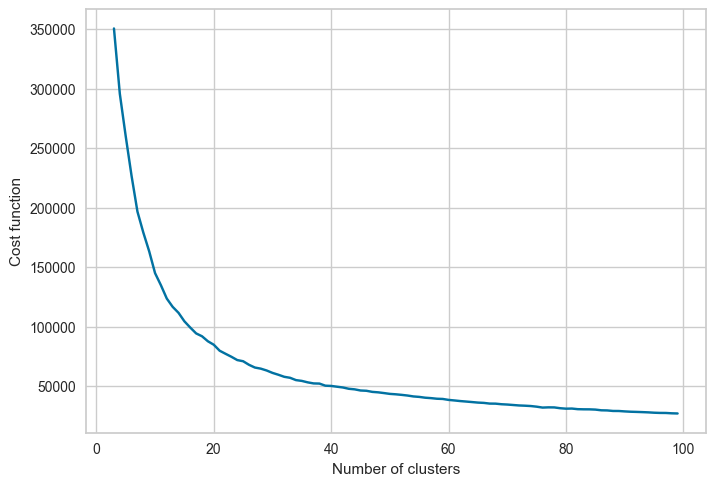

In [100]:
plt.figure()
plt.plot(list(sd.keys()), list(sd.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.show()

Using the elbow method as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. As measure of cost we use the sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at between 10 and 25 ... clusters mark. So, we’ll be keeping a k-cluster solution in this interval. To be more accurate we can use the following plot

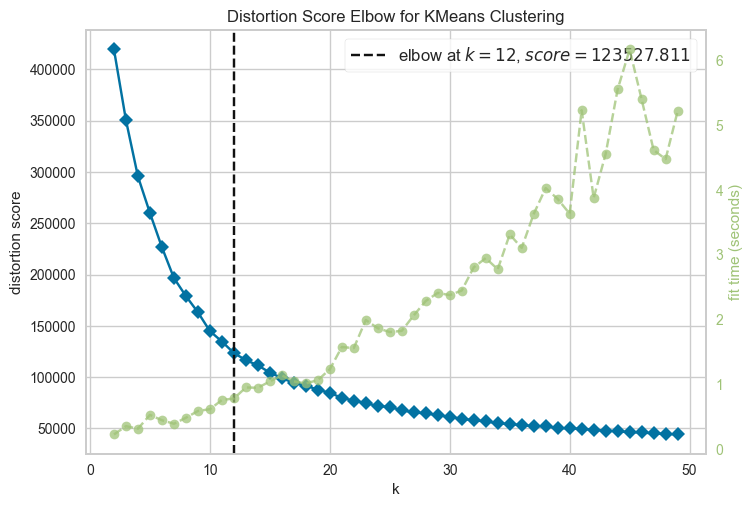

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 33)
visualizer = KElbowVisualizer(model, k=(2,50))

visualizer.fit(sample_data)     # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

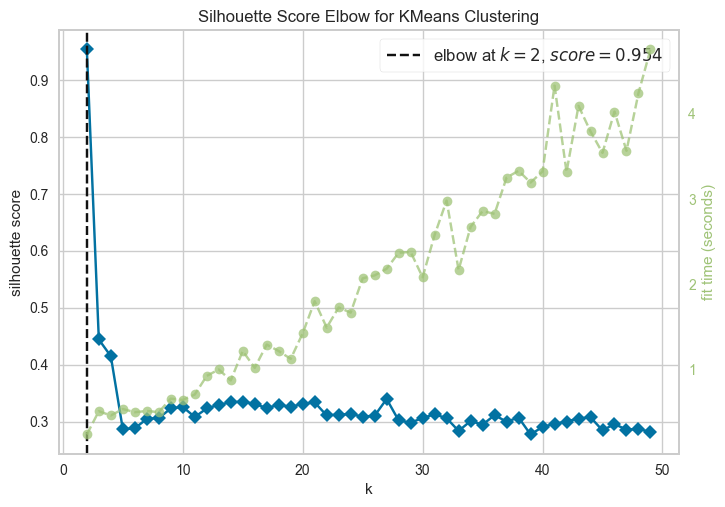

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [102]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 33)
visualizer = KElbowVisualizer(model, k=(2,50), metric = 'silhouette', timings = True)

visualizer.fit(sample_data)     # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

We decide to follow the method based on the distorsion score, so the number of cluster that we are going to choose is 12

#### 3 - Run the algorithm on the data.

In [26]:
clust = clustering(data, 12)

In [27]:
with open("/content/drive/MyDrive/ADM_HW4/clust_output.pkl", "wb") as file:
    pkl.dump(clust, file)

In [55]:
output_kmeans_ps = pd.read_pickle('clust_output.pkl')

#### 4 - K Means++

Both K-means and K-means++ are clustering methods which comes under unsupervised learning. The main difference between the two algorithms lies in:
 - the selection of the centroids around which the clustering takes place
 - k means++ removes the drawback of K means which is it is dependent on initialization of centroid

We are going to use the already implemented version of K-means++ (from the scikit-learn library)

In [56]:
# We have chosen four clusters, so we run K-means with number of clusters equals 12.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 12, init = 'k-means++' , random_state = 33)
# We fit our data with the k-means pca model
kmeans_pca.fit(data2)

KMeans(n_clusters=12, random_state=33)

Before all else, we’ll create a new data frame. It allows us to add in the values of the separate components to our segmentation data set. The components’ scores are stored in the ‘data’ variable. Let’s label them Component 1,2,3,4,5,6. In addition, we also append the ‘K means P C A’ labels to the new data frame.

In [57]:
## K-means clustering with PCA Results
# we create a new data frame with the original features and add the PCA scores and assigned clusters.

df_segm_pca_kmeans = pd.concat([CID_data.reset_index(drop = True), pd.DataFrame(data2)], axis = 1)
df_segm_pca_kmeans2 = df_segm_pca_kmeans[["CustomerID","AverageAmount (USD)","AverageBalance (USD)","pc1","pc2","pc3","pc4","pc5","pc6"]]

# The Last column we add contains the pea R-means clustering labels. 
df_segm_pca_kmeans["Segment K-means PCA"] =  kmeans_pca.labels_
df_segm_pca_kmeans2["Segment K-means PCA"] =  kmeans_pca.labels_

C:\Users\abell\AppData\Local\Temp\ipykernel_3320\304840670.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segm_pca_kmeans2["Segment K-means PCA"] =  kmeans_pca.labels_


We do the same using the output of the previous KMeans with PySpark, so later we can compare the two results of the different algorithms.

In [58]:
## K-means clustering with PCA Results
# we create a new data frame with the original features and add the PCA scores and assigned clusters.

# The Last column we add contains the pea R-means clustering labels. 
df_segm_pca_kmeans["Segment K-means PySp PCA"] =  output_kmeans_ps
df_segm_pca_kmeans2["Segment K-means PySp PCA"] =  output_kmeans_ps

C:\Users\abell\AppData\Local\Temp\ipykernel_3320\2921604670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segm_pca_kmeans2["Segment K-means PySp PCA"] =  output_kmeans_ps


In [59]:
df_segm_pca_kmeans2

,CustomerID,AverageAmount (USD),AverageBalance (USD),pc1,pc2,pc3,pc4,pc5,pc6,Segment K-means PCA,Segment K-means PySp PCA
0,C5841053,-0.236324,-0.111969,-0.518891,-0.618372,0.346319,1.464874,-1.281872,0.923696,6,11
1,C2142763,4.391152,-0.131744,2.593429,10.238761,-1.592661,-4.228786,-1.036864,-1.044591,8,9
2,C4417068,-0.164531,-0.111898,-0.516352,-0.487341,0.275540,1.778176,-1.289515,1.011696,6,11
3,C5342380,0.002577,0.418435,1.191499,-0.276929,1.227689,-1.421101,-0.704120,1.541486,6,5
4,C9031234,0.051095,-0.126092,-0.412399,0.277057,-0.890566,0.504830,1.101962,-0.557547,0,0
...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,0.255803,-0.134041,-0.277962,1.357223,-3.587174,-1.790675,1.360309,-0.599223,1,9
839077,C1034220,0.007672,-0.133089,-0.674376,0.717460,-4.220924,0.037691,1.327663,0.016071,1,1
839078,C8020229,-0.108288,-0.124921,-0.557233,-0.094091,-1.067252,0.840706,1.072331,-0.424431,0,0
839079,C6459278,-0.164366,-0.099896,-0.410451,-0.492721,0.494052,1.298620,1.098601,-0.121484,0,10


In [60]:
df_segm_pca_kmeans["Segment1"] = df_segm_pca_kmeans["Segment K-means PCA"].map({0:'first', 1:'second', 2: 'third', 3: 'fourth',
                                                                               4:'fifth', 5:'sixth', 6: 'seventh', 7: 'eighth',
                                                                               8:'nineth', 9:'tenth', 10: 'eleventh', 11: 'twelth',
                                                                               })
df_segm_pca_kmeans["Segment2"] = df_segm_pca_kmeans["Segment K-means PySp PCA"].map({0:'first', 1:'second', 2: 'third', 3: 'fourth',
                                                                               4:'fifth', 5:'sixth', 6: 'seventh', 7: 'eighth',
                                                                               8:'nineth', 9:'tenth', 10: 'eleventh', 11: 'twelth',
                                                                               })
df_segm_pca_kmeans2["Segment1"] = df_segm_pca_kmeans2["Segment K-means PCA"].map({0:'first', 1:'second', 2: 'third', 3: 'fourth',
                                                                               4:'fifth', 5:'sixth', 6: 'seventh', 7: 'eighth',
                                                                               8:'nineth', 9:'tenth', 10: 'eleventh', 11: 'twelth',
                                                                               })
df_segm_pca_kmeans2["Segment2"] = df_segm_pca_kmeans2["Segment K-means PySp PCA"].map({0:'first', 1:'second', 2: 'third', 3: 'fourth',
                                                                               4:'fifth', 5:'sixth', 6: 'seventh', 7: 'eighth',
                                                                               8:'nineth', 9:'tenth', 10: 'eleventh', 11: 'twelth',
                                                                               })

C:\Users\abell\AppData\Local\Temp\ipykernel_3320\1362144929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segm_pca_kmeans2["Segment1"] = df_segm_pca_kmeans2["Segment K-means PCA"].map({0:'first', 1:'second', 2: 'third', 3: 'fourth',
C:\Users\abell\AppData\Local\Temp\ipykernel_3320\1362144929.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segm_pca_kmeans2["Segment2"] = df_segm_pca_kmeans2["Segment K-means PySp PCA"].map({0:'first', 1:'second', 2: 'third', 3: 'fourth',


In [61]:
df_segm_pca_kmeans2

,CustomerID,AverageAmount (USD),AverageBalance (USD),pc1,pc2,pc3,pc4,pc5,pc6,Segment K-means PCA,Segment K-means PySp PCA,Segment1,Segment2
0,C5841053,-0.236324,-0.111969,-0.518891,-0.618372,0.346319,1.464874,-1.281872,0.923696,6,11,seventh,twelth
1,C2142763,4.391152,-0.131744,2.593429,10.238761,-1.592661,-4.228786,-1.036864,-1.044591,8,9,nineth,tenth
2,C4417068,-0.164531,-0.111898,-0.516352,-0.487341,0.275540,1.778176,-1.289515,1.011696,6,11,seventh,twelth
3,C5342380,0.002577,0.418435,1.191499,-0.276929,1.227689,-1.421101,-0.704120,1.541486,6,5,seventh,sixth
4,C9031234,0.051095,-0.126092,-0.412399,0.277057,-0.890566,0.504830,1.101962,-0.557547,0,0,first,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,0.255803,-0.134041,-0.277962,1.357223,-3.587174,-1.790675,1.360309,-0.599223,1,9,second,tenth
839077,C1034220,0.007672,-0.133089,-0.674376,0.717460,-4.220924,0.037691,1.327663,0.016071,1,1,second,second
839078,C8020229,-0.108288,-0.124921,-0.557233,-0.094091,-1.067252,0.840706,1.072331,-0.424431,0,0,first,first
839079,C6459278,-0.164366,-0.099896,-0.410451,-0.492721,0.494052,1.298620,1.098601,-0.121484,0,10,first,eleventh


We can plot the two principal components grouped by the cluster labels, we can notice that their are ortogonal.

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

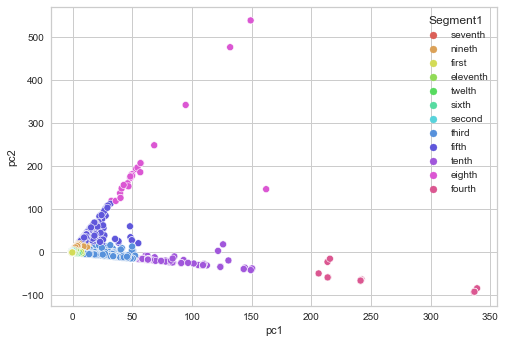

In [62]:
sns.scatterplot(x = df_segm_pca_kmeans ["pc1"] ,
                y= df_segm_pca_kmeans ["pc2"],
                palette = sns.color_palette('hls',len(df_segm_pca_kmeans.Segment1.unique())),
               hue = df_segm_pca_kmeans.Segment1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

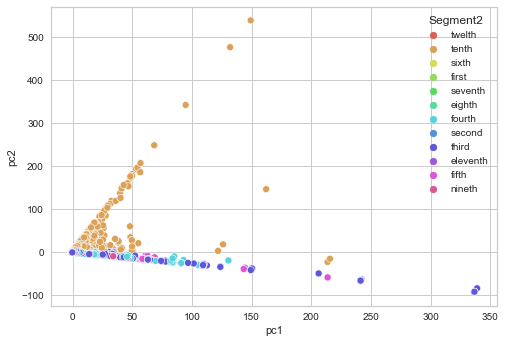

In [63]:
sns.scatterplot(x = df_segm_pca_kmeans ["pc1"] ,
                y= df_segm_pca_kmeans ["pc2"],
                palette = sns.color_palette('hls',len(df_segm_pca_kmeans.Segment2.unique())),
               hue = df_segm_pca_kmeans.Segment2)

In the following plot is represented the relationship between average amount (usd) and average balance (usd) grouped by cluster labels. (standardized data)

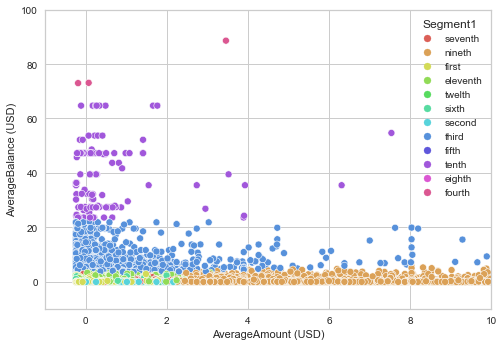

In [64]:
g = sns.scatterplot(x = df_segm_pca_kmeans2 ["AverageAmount (USD)"] ,
                y= df_segm_pca_kmeans2 ["AverageBalance (USD)"],
                palette = sns.color_palette('hls',len(df_segm_pca_kmeans.Segment1.unique())),
               hue = df_segm_pca_kmeans.Segment1)
g.set(ylim=(-10, 100))
g.set(xlim=(-1, 10))
plt.show()

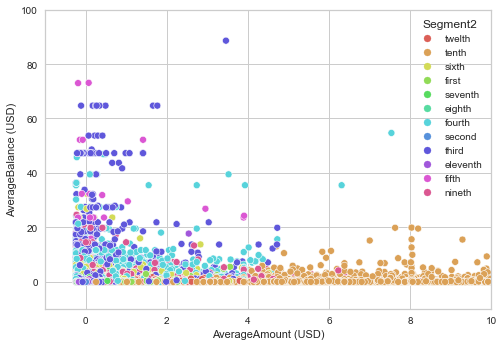

In [65]:
g = sns.scatterplot(x = df_segm_pca_kmeans2 ["AverageAmount (USD)"] ,
                y= df_segm_pca_kmeans2 ["AverageBalance (USD)"],
                palette = sns.color_palette('hls',len(df_segm_pca_kmeans.Segment2.unique())),
               hue = df_segm_pca_kmeans.Segment2)
g.set(ylim=(-10, 100))
g.set(xlim=(-1, 10))
plt.show()

Now we want to measure how many Customers are in a different cluster using the KMeans with PySpark rather than the KMeans++.

In [66]:
different = {}
for i in range(len(df_segm_pca_kmeans2["Segment K-means PCA"])):
    if df_segm_pca_kmeans2["Segment K-means PCA"].iloc[i] != df_segm_pca_kmeans2["Segment K-means PySp PCA"].iloc[i]:
        cluster = df_segm_pca_kmeans2["Segment K-means PCA"].iloc[i]
        if cluster in different.keys():
            different[cluster] += 1
        else:
            different[cluster] = 1

In [88]:
different

{6: 236358,
 8: 8688,
 10: 78677,
 0: 194773,
 11: 43141,
 5: 115234,
 1: 30492,
 4: 872,
 2: 1812,
 9: 146,
 7: 26,
 3: 28}

In [84]:
print('The total number of differences between the clusters is: ' + str(sum(different.values())) + ' over ' + str(len(df_segm_pca_kmeans2["Segment K-means PCA"])) + ' values.')
print('The percentage of similarity between the two results is: ' + str(1 - (sum(different.values())/len(df_segm_pca_kmeans2["Segment K-means PCA"]))))

The total number of differences between the clusters is: 710247 over 839081 values.
The percentage of similarity between the two results is: 0.1535417915552849


From these results we can conclude that using the two algorithms the differences are substantial. 
This is exactly what we were expecting, since the KMeans++ starts with the allocation of one cluster center at random and then searches for other centers given the first one, while the KMeans that we implemented starts from a random state initialized manually and then it keeps being dependent from the first random state (rather than only from the right previous one). To make it works better you should run it a lot of time and then compute a summary solution coming out from all of the others.

### 2.4 Analysing your results!

#### - 2.4.1

We thought that the most relevant variables in our dataset to identify the cluster of the customer are `AverageAmount (USD)` that is the average amount of transactions done by each CustomerID, `AverageBalance (USD)` that is the average balance of each CustomerID and `AverageCustomerAge` that is the average age of each CustomerID (remember that every CustomerAccount may have more than one person).

In [ ]:
df_pivot = pd.read_pickle("CID_data.pkl")

In [76]:
df_pivot.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF',
       'Segment K-means PCA', 'Segment1'],
      dtype='object')

In [72]:
df_pivot =  pd.concat([df_pivot.reset_index(drop = True), pd.DataFrame(df_segm_pca_kmeans[["Segment K-means PCA","Segment1"]])], axis = 1)

In [ ]:
df_pivot = df_pivot[['CustomerID','MostCommonGender', "AverageBalance (USD)",'AverageCustomerAge', "Segment K-means PCA","Segment1"]]

#### - 2.4.2

- Categorial AverageBalance (USD)

In [377]:
bins_average_balance = np.arange(df_pivot[["AverageBalance (USD)"]].min().values[0] -1 ,df_pivot[["AverageBalance (USD)"]].max().values[0]+1, ((df_pivot[["AverageBalance (USD)"]].max()+1)/4).values[0])

In [378]:
bins_average_balance

array([-1.00000000e+00,  3.52128681e+05,  7.04258362e+05,  1.05638804e+06,
        1.40851772e+06])

In [380]:
df_pivot['AverageBalance (USD)2'] = pd.cut(x=df_pivot['AverageBalance (USD)'], bins= bins_average_balance,
                     labels=['Very Low', 'Low', 'High',
                             'Very High'])

In [381]:
df_pivot['AverageBalance (USD)2']

0         Very Low
1         Very Low
2         Very Low
3         Very Low
4         Very Low
            ...   
838763    Very Low
838764    Very Low
838765    Very Low
838766    Very Low
838767    Very Low
Name: AverageBalance (USD)2, Length: 838768, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

- Categorial AverageCustomerAge

In [382]:
bins_average_age = np.arange(df_pivot[["AverageCustomerAge"]].min().values[0] ,df_pivot[["AverageCustomerAge"]].max().values[0]+3, ((df_pivot[["AverageCustomerAge"]].max()+4)/5).values[0])

In [383]:
bins_average_age

array([ 22. ,  47.2,  72.4,  97.6, 122.8])

In [384]:
df_pivot['AverageCustomerAge2'] = pd.cut(x=df_pivot['AverageCustomerAge'], bins= bins_average_age,
                     labels=['Very Young', 'Young', 'Old',
                             'Very Old'])

In [385]:
df_pivot['AverageCustomerAge2']

0         Very Young
1              Young
2         Very Young
3         Very Young
4         Very Young
             ...    
838763    Very Young
838764    Very Young
838765    Very Young
838766    Very Young
838767    Very Young
Name: AverageCustomerAge2, Length: 838768, dtype: category
Categories (4, object): ['Very Young' < 'Young' < 'Old' < 'Very Old']

- MostCommonGender

This variable is already categorial with 3 categories ( M, F, FM), comung from the previous points.

#### - 2.4.3, 2.4.4, 2.4.5 

- Pivot AverageBalance (USD)

In [387]:
round(pd.crosstab(index=df_pivot["Segment"], columns=df_pivot['AverageBalance (USD)2'],normalize='index')*100,2)

AverageBalance (USD)2,Very Low,Low,High,Very High
Segment,,,,
eighth,96.15,3.85,0.00,0.00
eleventh,100.00,0.00,0.00,0.00
fifth,100.00,0.00,0.00,0.00
first,100.00,0.00,0.00,0.00
fourth,100.00,0.00,0.00,0.00
nineth,100.00,0.00,0.00,0.00
second,100.00,0.00,0.00,0.00
seventh,100.00,0.00,0.00,0.00
sixth,100.00,0.00,0.00,0.00


Most consumers, as we had already noted possess a very low average balance, so dividing the numerical variable into 4 categories as required it is normal that almost all of the information belongs to the very low balance category. The correct thing to do would be to stagger the low balance even more so that we can better see how the information is distributed in the clusters. 

Let us dwell on these results, however, and we can see that there is one cluster, namely the third one that captures those who have a high or very high balance. In fact, we can say that segment 3 consists of 71.43% CustomerIDs with high average balance and 28.57% CustomerIDs with very high average balance. Instead people with low average balance are captured are from the tenth cluster, which consists of 55.10% CustomerIDs with very low average balance and 45.90% CustomerIDs with low average balance.

- Pivot AverageCustomerAge2

In [388]:
round(pd.crosstab(index=df_pivot["Segment"], columns=df_pivot['AverageCustomerAge2'],normalize='index')*100,2)

AverageCustomerAge2,Very Young,Young,Old,Very Old
Segment,,,,
eighth,65.38,34.62,0.00,0.00
eleventh,85.17,14.54,0.29,0.00
fifth,94.14,5.86,0.00,0.00
first,8.46,85.40,5.54,0.60
fourth,99.77,0.23,0.00,0.00
nineth,99.84,0.16,0.00,0.00
second,99.83,0.17,0.00,0.00
seventh,61.12,34.75,4.13,0.00
sixth,51.09,45.98,2.86,0.07


Regarding the average customer age we are faced with a more varied breakdown. First, we note that many segments are mostly composed of CustomerIDs with a very low average customer age. it is possible to say that the first and tenth contain mostly young people while the CustomerIDs with an average classified as old were mostly captured by the third cluster. The latter is also 42.86% composed of young people and minimally of very young people

- Pivot MostCommonGender

In [391]:
round(pd.crosstab(index=df_pivot["Segment"], columns=df_pivot['MostCommonGender'],normalize='index')*100,2)

MostCommonGender,F,M,MF
Segment,,,
eighth,34.62,65.38,0.00
eleventh,10.84,56.08,33.08
fifth,20.80,73.72,5.47
first,26.30,72.49,1.21
fourth,27.46,70.32,2.22
nineth,23.47,75.44,1.09
second,26.72,66.40,6.89
seventh,26.49,72.02,1.49
sixth,16.41,79.87,3.72


The most common gender in all clusters is male except in the case of the third segment, which consists of 53.57% CustomerIDs with a female MostCommonGender and 46.43% CustomerIDs with a male MostCommonGender. Instead, we see that the cluster that captures the information of a MostCommonGender at par is the eleventh, it is the only one with such a high percentage.

#### - 2.4.6

- Cluster algorithm performance (using silhouette score)

 The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

- Mean distance between the observation and **all other data points in the same cluster**. This distance can also be called a **mean intra-cluster** distance. The mean distance is denoted by **a**.


- Mean distance between the observation and **all other data points of the next nearest cluster**. This distance can also be called a **mean nearest-cluster** distance. The mean distance is denoted by **b**

Silhouette score, S, for each sample is calculated using the following formula:

<div align="center">
$ S = \frac{(b - a)}{max(a, b)}$
    

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.
The following function returns the mean Silhouette Coefficient over all samples. 

In [395]:
kmeans_pca_sample = KMeans(n_clusters = 12, init = 'k-means++' , random_state = 33)
# We fit our data with the k-means pca model
kmeans_pca_sample.fit(sample_data)

cluster_labels = kmeans_pca_sample.labels_
# silhouette score
silhouette_avg = silhouette_score(sample_data, cluster_labels)
print("For n_clusters= 12, the silhouette score is {0}".format(silhouette_avg))

For n_clusters= 12, the silhouette score is 0.3230392323047044


We compute the silhouette score on the sample data, but we can genereralize the result to all dataset.
We can conclude that the average silhouette score is about 0.32.

## Bonus

Think about any two other clustering algorithms that you would like to use for the dataset (of course, you can use implemented version of them, e.g. from the scikit-learn library). Compare the results of chosen two algorithms with K-means implemented by you and K-means++ (from the scikit-learn library). Explain the differences (if there are any) in the results. Which one is the best, in your opinion, and why?

**Agglomerative (bottom-up)**
- you start with a partition in which each i belongs to a cluster
- in each step you bottom the "2 most similar clusters" into a single cluster
- the previous step is repeated until a single cluster is obtained

**Linkage**
- is the measure of dissimilarity between two groups
- there are different measures of linkage
- by changing the linkage we get different hierarchical clustering

It produces sequences of monotone heights: the level of dissimilarity between the 2 fused clusters in each step increases in each step. This property, called non-inversion, allows the graph to be represented correctly.

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
sample_data = data2.sample(1000)

#### Single Linkage

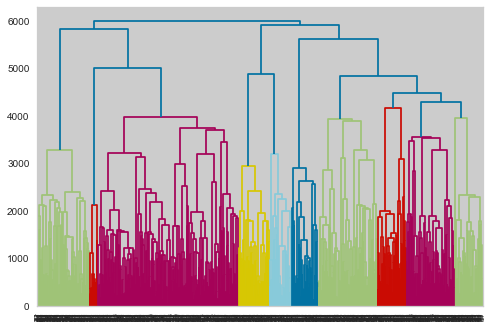

In [6]:
single = dendrogram(linkage(sample_data,method='single'))

**Problem** : **Chaining**, concerns single linkage where two groups are merged according to based on the least dissimilar pair of objects while ignoring all others. Single linkage tends to produce clusters for this that are not very compact (large dispersion) and very unbalanced.

#### Complete Linkage

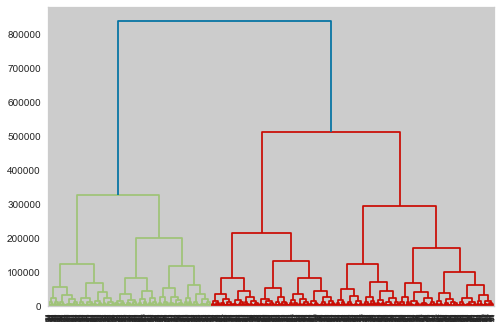

In [7]:
complete = dendrogram(linkage(sample_data,method='complete'))

**Problem** : **Crowding**, concerns complete linkage where two groups are merged based on the most dissimilar pair of objects while ignoring all others. Complete linkage tends to produce for compact but loosely separated clusters.

#### Average Linkage

Average linkage stands as an intermediate to single and complete linkage, so it is usually the default choice.

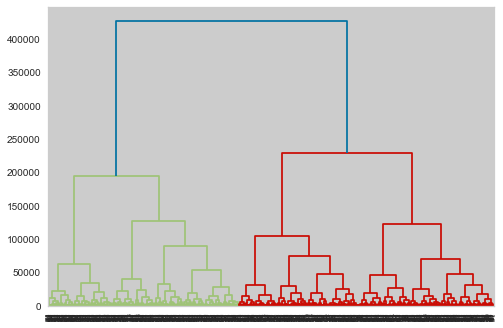

In [8]:
average = dendrogram(linkage(sample_data,method='average'))

Surprisingly, in this specific case it seems to give back the same result as the complete linkage.

So we decide to proceed clustering with this third method.

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
sample_data2 = df_segm_pca_kmeans2.sample(30000)

In [99]:
model = AgglomerativeClustering(n_clusters=12, affinity='euclidean',linkage='average')

In [100]:
model.fit(sample_data2[["pc1","pc2","pc3","pc4","pc5","pc6"]])

AgglomerativeClustering(linkage='average', n_clusters=12)

In [101]:
sample_data2['cluster'] = model.fit_predict(sample_data2[["pc1","pc2","pc3","pc4","pc5","pc6"]])

In [102]:
unique_values = len(sample_data2.cluster.unique())

<AxesSubplot:xlabel='AverageAmount (USD)', ylabel='AverageBalance (USD)'>

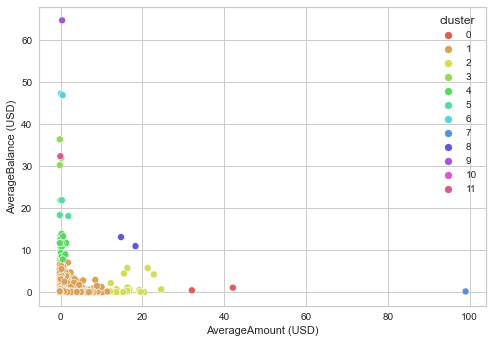

In [104]:
sns.scatterplot(x = sample_data2['AverageAmount (USD)'],
                y = sample_data2['AverageBalance (USD)'],
                palette = sns.color_palette('hls',unique_values),
               hue = sample_data2.cluster)

## Algorithmic Question

#### 1st trial:

In [124]:
entry,n_studs,n_guards= list(map(int,input().split()))

students  = list(map(int,input().split()))

guards = 1
for i in range(1,n_studs) :
    if(students[i] != students[i-1] and students[i] not in students[:i]):
        if(students[i-1] in students[i:]):
            guards += 1

print( 'Yes' if guards <= n_guards else 'No')

 4 5 1
 1 1 3 3 3


Yes


#### 2nd trial:

In [125]:
entry,n_studs,n_guards= list(map(int,input().split()))

students  = list(map(int,input().split()))

guards = 1
for i in range(1,n_studs) :
    if(students[i] != students[i-1] and students[i] not in students[:i]):
        if(students[i-1] in students[i:]):
            guards += 1

print( 'Yes' if guards <= n_guards else 'No')

 2 5 1
 1 2 1 2 2


No
